In [3]:
import sys
sys.path.append("..")

from citibikeAPI import *
from utils import *

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [118]:
station_data = getAllStationData()
station_data.to_csv('stations.csv')
trip_data = pd.read_csv('../../raw/202003-citibike-tripdata.csv')


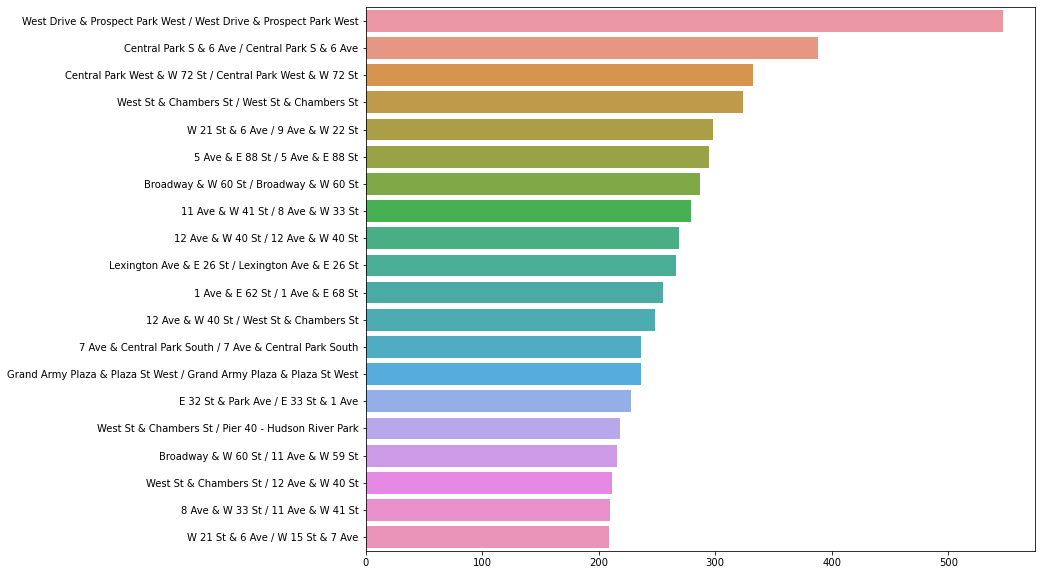

In [79]:
trips=trip_data.value_counts(['start station name','end station name'])[:20]
trip_names=[trips.index[t][0] + ' / ' + trips.index[t][1] for t in range(len(trips))]
plt.figure(figsize=(12,10))
sns.barplot( x= list(trips.values), y = trip_names, orient="h") ;

In [80]:
trips = trip_data[trip_data['start station id'] != trip_data['end station id']].value_counts(['start station name','end station name'])

In [81]:
unique_stations = list(set([trips.index[i][0] for i in range(len(trips))]))

In [122]:
adjacencyDict = {}
for station in unique_stations: 
	try: 
		id = station_data.index[station_data['name']==station][0]
		top_ten_routes = trips[station][:10]
		edges = []
		for route in top_ten_routes.index: 
			edges.append(station_data.index[station_data['name']==route][0])
		adjacencyDict[id] = edges
	except IndexError: 
		pass 
# adjacencyDict[station] = [station_data.index[s['name']==route][0] for route in top_ten_routes.index]

In [126]:
pd.DataFrame(adjacencyDict).T

,0,1,2,3,4,5,6,7,8,9
66ddea99-0aca-11e7-82f6-3863bb44ef7c,66ddec3e-0aca-11e7-82f6-3863bb44ef7c,66de1448-0aca-11e7-82f6-3863bb44ef7c,66de65a4-0aca-11e7-82f6-3863bb44ef7c,66dde9af-0aca-11e7-82f6-3863bb44ef7c,66de5d57-0aca-11e7-82f6-3863bb44ef7c,66de205d-0aca-11e7-82f6-3863bb44ef7c,66de5e5b-0aca-11e7-82f6-3863bb44ef7c,66dde7dc-0aca-11e7-82f6-3863bb44ef7c,66dded7a-0aca-11e7-82f6-3863bb44ef7c,66de1fe7-0aca-11e7-82f6-3863bb44ef7c
43f3d3c7-46b0-4812-879d-15afe8804c5f,66dd3cb4-0aca-11e7-82f6-3863bb44ef7c,66dd2811-0aca-11e7-82f6-3863bb44ef7c,822d96e8-fb6c-463a-b866-aec9e408ad5e,b94d0241-bce7-44a9-ab1c-ece0740a4134,548cb08c-4ec1-46d9-8978-1a8d3bf42454,4753c1ba-a86e-431e-94fb-06403cdee4d7,66dd2292-0aca-11e7-82f6-3863bb44ef7c,91ca68bd-5ac1-470b-a26d-1ec98ea9cca4,2ec1235f-a043-4e3a-9ba1-56f7dd4624b7,59ad8f95-32a4-43de-b1c3-79c667b2d2df
66db3a1e-0aca-11e7-82f6-3863bb44ef7c,66dc748f-0aca-11e7-82f6-3863bb44ef7c,d9160982-2d9b-4f08-9469-a559a7b62809,66dbce8a-0aca-11e7-82f6-3863bb44ef7c,66db6387-0aca-11e7-82f6-3863bb44ef7c,0f45bcf6-7028-4584-a51e-4129847dbebc,66db65aa-0aca-11e7-82f6-3863bb44ef7c,66db3273-0aca-11e7-82f6-3863bb44ef7c,66dc10d1-0aca-11e7-82f6-3863bb44ef7c,66db76a1-0aca-11e7-82f6-3863bb44ef7c,66dbe571-0aca-11e7-82f6-3863bb44ef7c
66dd3d7f-0aca-11e7-82f6-3863bb44ef7c,66dd42eb-0aca-11e7-82f6-3863bb44ef7c,66de1a1f-0aca-11e7-82f6-3863bb44ef7c,66dd491c-0aca-11e7-82f6-3863bb44ef7c,66dd455e-0aca-11e7-82f6-3863bb44ef7c,e36b5913-8e46-4c2a-b9be-73bdf8ee548b,66de2556-0aca-11e7-82f6-3863bb44ef7c,66dbe7b6-0aca-11e7-82f6-3863bb44ef7c,3140,66dd4356-0aca-11e7-82f6-3863bb44ef7c,66dd4841-0aca-11e7-82f6-3863bb44ef7c
66dce4fc-0aca-11e7-82f6-3863bb44ef7c,e35c42c6-8b73-4528-b08d-c94b75624b40,66dcec6b-0aca-11e7-82f6-3863bb44ef7c,e58234a3-5b23-427e-948f-c1e4571b2bfa,66dea52b-0aca-11e7-82f6-3863bb44ef7c,bfbd1f09-afd2-49d2-8674-3a07b3c929a4,66dccc99-0aca-11e7-82f6-3863bb44ef7c,66dc8b6a-0aca-11e7-82f6-3863bb44ef7c,66dcccfe-0aca-11e7-82f6-3863bb44ef7c,66dc252e-0aca-11e7-82f6-3863bb44ef7c,66dce660-0aca-11e7-82f6-3863bb44ef7c
...,...,...,...,...,...,...,...,...,...,...
66de5005-0aca-11e7-82f6-3863bb44ef7c,66de65a4-0aca-11e7-82f6-3863bb44ef7c,66de1fe7-0aca-11e7-82f6-3863bb44ef7c,66ddeffd-0aca-11e7-82f6-3863bb44ef7c,66de0d91-0aca-11e7-82f6-3863bb44ef7c,66de1ea2-0aca-11e7-82f6-3863bb44ef7c,66de25bd-0aca-11e7-82f6-3863bb44ef7c,66de2199-0aca-11e7-82f6-3863bb44ef7c,66de4f9c-0aca-11e7-82f6-3863bb44ef7c,66db281e-0aca-11e7-82f6-3863bb44ef7c,66de1580-0aca-11e7-82f6-3863bb44ef7c
ec42fb3a-af54-46aa-a8b3-b17d72ed4475,fc774664-3c9b-4a8f-a79e-f6907db00a1d,66dd3cb4-0aca-11e7-82f6-3863bb44ef7c,0fa27bd7-b182-4e7a-b5bb-90f4249cb368,91ca68bd-5ac1-470b-a26d-1ec98ea9cca4,66db8c10-0aca-11e7-82f6-3863bb44ef7c,8c2ed08f-1660-4db8-9168-4709427c23ed,66dd2292-0aca-11e7-82f6-3863bb44ef7c,822d96e8-fb6c-463a-b866-aec9e408ad5e,b94d0241-bce7-44a9-ab1c-ece0740a4134,2ec1235f-a043-4e3a-9ba1-56f7dd4624b7
66db8c10-0aca-11e7-82f6-3863bb44ef7c,66dc748f-0aca-11e7-82f6-3863bb44ef7c,66dc259a-0aca-11e7-82f6-3863bb44ef7c,66db6387-0aca-11e7-82f6-3863bb44ef7c,66db6963-0aca-11e7-82f6-3863bb44ef7c,66dc36c3-0aca-11e7-82f6-3863bb44ef7c,66dc3e89-0aca-11e7-82f6-3863bb44ef7c,66ddd545-0aca-11e7-82f6-3863bb44ef7c,66dc7773-0aca-11e7-82f6-3863bb44ef7c,66dc120f-0aca-11e7-82f6-3863bb44ef7c,66dc8527-0aca-11e7-82f6-3863bb44ef7c
66de71af-0aca-11e7-82f6-3863bb44ef7c,66dbea8d-0aca-11e7-82f6-3863bb44ef7c,66db88f5-0aca-11e7-82f6-3863bb44ef7c,2a47ef14-1cbe-4ec6-841d-cc277627fe20,66db3f01-0aca-11e7-82f6-3863bb44ef7c,66dbf6d2-0aca-11e7-82f6-3863bb44ef7c,66db281e-0aca-11e7-82f6-3863bb44ef7c,66dbc60f-0aca-11e7-82f6-3863bb44ef7c,66dbee85-0aca-11e7-82f6-3863bb44ef7c,66dbcd6c-0aca-11e7-82f6-3863bb44ef7c,66de25bd-0aca-11e7-82f6-3863bb44ef7c


In [117]:
for station in unique_stations: 
	print(station)
	idx = station_data.index[station_data['name']==station][0]
	print(idx)


10 St & 7 Ave
66ddea99-0aca-11e7-82f6-3863bb44ef7c
35 Ave & 10 St
43f3d3c7-46b0-4812-879d-15afe8804c5f
West End Ave & W 78 St
8bab3ee9-1302-46a0-b755-f21a2ff4e7ba
Wyckoff St & Nevins St


IndexError: index 0 is out of bounds for axis 0 with size 0